# CS 412 Homework 2

## Import Libraries
The libraries used in this homework are already preinstalled in Google Colab. If you are working locally, make sure to create a virtual environment and install the required libraries there.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import nltk

nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load data

In [ ]:
# Downloading data
import gdown
data_url = "https://drive.google.com/uc?id=1qWmgoMgr56hpCEjJe0XQ-K46-yMpFhVS"
save_path = "imdb_dataset.csv"
gdown.download(data_url, save_path)

Downloading...
From: https://drive.google.com/uc?id=1qWmgoMgr56hpCEjJe0XQ-K46-yMpFhVS
To: /content/imdb_dataset.csv
100%|██████████| 66.2M/66.2M [00:00<00:00, 75.7MB/s]


'imdb_dataset.csv'

In [ ]:
df = pd.read_csv("imdb_dataset.csv")

## **1. Preproces text data** (30 pts)
In this section, you have to preprocess the text data in order to convert it to a numerical representation that can be passed to machine learning models.

### 1.1 **Remove HTML**
Since these reviews were scraped from the internet, some of them still have some HTML tags (like \<a> or \<br>). These tags do not have any semantic meaning. Therefore, we have to remove them to avoid having noise in our data. Otherwise, the model will assume that these are words that have meanings. Here is one example of HTML tags in our data:

In [ ]:
df.loc[1, 'review']

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [ ]:
# Remove HTML
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

df['review'] = df['review'].apply(remove_html_tags)

print(df.loc[1, 'review'])
#df.to_csv('imdb_dataset_cleaned.csv', index=False)

<ipython-input-73-00a77052a591>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.


### 1.2 **Converting text to lowercase**

In text analysis, we usually convert text to lowercase to avoid having a very large vocabulary. For instance, if we do not convert the text to lowercase, the model will treat "apple", "Apple", and "APPLE" as completely different words. This way the number of words that the model has to know (which we call vocabulary) becomes very large.

In [ ]:
# Convert to lower case
df['review'] = df['review'].str.lower()


### 1.3 **Remove punctuation and special characters**
Since our goal in this task is sentiment analysis, punctuations and special characters (like parantheses, percentage signs, etc.) do not change the sentiment of a movie review. Therefore we remove them to reduce the vocabulary size. One may argue that the exclamation (!) mark may affect the intensity of a sentiment. You have the choice to choose which punctuation marks to remove and which ones to keep. You have to remove some of them though to get the points for this part :)

In [ ]:
# Remove punctuation and special characters
import re

def remove_punctuation_and_special_characters(text):
    return re.sub(r'[^\w\s?!]', '', text)

df['review'] = df['review'].apply(remove_punctuation_and_special_characters)
print(df.loc[1, 'review'])

a wonderful little production the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done


### 1.4 **Tokenization**
Now we want to convert each review into a sequence of words. This process is called tokenization. **Use `word_tokenize` from the `nltk.tokenize` module to tokenize each review**.

In [ ]:
from nltk.tokenize import word_tokenize

test = 'Hello! this is a test'
print(f"Tokenized sentence: {word_tokenize(test)}")

Tokenized sentence: ['Hello', '!', 'this', 'is', 'a', 'test']


In [ ]:
# Tokenize the review texts
from nltk.tokenize import word_tokenize
def tokenize_text(text):
    return word_tokenize(text)

df['review'] = df['review'].apply(tokenize_text)
print(df.loc[1, 'review'])

['a', 'wonderful', 'little', 'production', 'the', 'filming', 'technique', 'is', 'very', 'unassuming', 'very', 'oldtimebbc', 'fashion', 'and', 'gives', 'a', 'comforting', 'and', 'sometimes', 'discomforting', 'sense', 'of', 'realism', 'to', 'the', 'entire', 'piece', 'the', 'actors', 'are', 'extremely', 'well', 'chosen', 'michael', 'sheen', 'not', 'only', 'has', 'got', 'all', 'the', 'polari', 'but', 'he', 'has', 'all', 'the', 'voices', 'down', 'pat', 'too', '!', 'you', 'can', 'truly', 'see', 'the', 'seamless', 'editing', 'guided', 'by', 'the', 'references', 'to', 'williams', 'diary', 'entries', 'not', 'only', 'is', 'it', 'well', 'worth', 'the', 'watching', 'but', 'it', 'is', 'a', 'terrificly', 'written', 'and', 'performed', 'piece', 'a', 'masterful', 'production', 'about', 'one', 'of', 'the', 'great', 'masters', 'of', 'comedy', 'and', 'his', 'life', 'the', 'realism', 'really', 'comes', 'home', 'with', 'the', 'little', 'things', 'the', 'fantasy', 'of', 'the', 'guard', 'which', 'rather', 't

### 1.5 **Removing stop words**


We also need to remove the stopwords (is, the, you, etc.) since they do not add to the meaning. Why? To reduce the vocabulary size 😃. **You can get a list of all stopwords from the nltk library**.

In [ ]:
# Remove stop words
from nltk.corpus import stopwords
nltk.download('stopwords')

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token.lower() not in stop_words]

df['review'] = df['review'].apply(remove_stopwords)
print(df.loc[1, 'review'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['wonderful', 'little', 'production', 'filming', 'technique', 'unassuming', 'oldtimebbc', 'fashion', 'gives', 'comforting', 'sometimes', 'discomforting', 'sense', 'realism', 'entire', 'piece', 'actors', 'extremely', 'well', 'chosen', 'michael', 'sheen', 'got', 'polari', 'voices', 'pat', '!', 'truly', 'see', 'seamless', 'editing', 'guided', 'references', 'williams', 'diary', 'entries', 'well', 'worth', 'watching', 'terrificly', 'written', 'performed', 'piece', 'masterful', 'production', 'one', 'great', 'masters', 'comedy', 'life', 'realism', 'really', 'comes', 'home', 'little', 'things', 'fantasy', 'guard', 'rather', 'use', 'traditional', 'dream', 'techniques', 'remains', 'solid', 'disappears', 'plays', 'knowledge', 'senses', 'particularly', 'scenes', 'concerning', 'orton', 'halliwell', 'sets', 'particularly', 'flat', 'halliwells', 'murals', 'decorating', 'every', 'surface', 'terribly', 'well', 'done']


### 1.6 **Stemming**

Apply stemming using one of the `SnowballStemmer` stemmers in the nltk library.

In [ ]:
# Apply Stemming
from nltk.stem import SnowballStemmer

def apply_stemming(tokens):
    stemmer = SnowballStemmer("english")
    return [stemmer.stem(token) for token in tokens]

df['review'] = df['review'].apply(apply_stemming)
print(df.loc[1, 'review'])

['wonder', 'littl', 'product', 'film', 'techniqu', 'unassum', 'oldtimebbc', 'fashion', 'give', 'comfort', 'sometim', 'discomfort', 'sens', 'realism', 'entir', 'piec', 'actor', 'extrem', 'well', 'chosen', 'michael', 'sheen', 'got', 'polari', 'voic', 'pat', '!', 'truli', 'see', 'seamless', 'edit', 'guid', 'refer', 'william', 'diari', 'entri', 'well', 'worth', 'watch', 'terrif', 'written', 'perform', 'piec', 'master', 'product', 'one', 'great', 'master', 'comedi', 'life', 'realism', 'realli', 'come', 'home', 'littl', 'thing', 'fantasi', 'guard', 'rather', 'use', 'tradit', 'dream', 'techniqu', 'remain', 'solid', 'disappear', 'play', 'knowledg', 'sens', 'particular', 'scene', 'concern', 'orton', 'halliwel', 'set', 'particular', 'flat', 'halliwel', 'mural', 'decor', 'everi', 'surfac', 'terribl', 'well', 'done']


### 1.7 **Joining review text**
Now that we have removed the stopwords and applied stemming on each word, we need to convert each review from a list of word to a space-separated string. The reason we do this is that the functions that are used to extract numerical representations from text expect the input to be a single string not a list of words.

**Convert each review from a list of words to a space-separated string.**

In [ ]:
# Your solution
def list_to_string(words_list):
    return ' '.join(words_list)

df['review'] = df['review'].apply(list_to_string)
print(df.loc[1, 'review'])

wonder littl product film techniqu unassum oldtimebbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen got polari voic pat ! truli see seamless edit guid refer william diari entri well worth watch terrif written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particular scene concern orton halliwel set particular flat halliwel mural decor everi surfac terribl well done


## 2. **Buidling Simple NN Models** (70 Pts)
In this section, you will build neural network models to predict the sentiment of each review. You will build three models, where each of the models uses a different numerical representation of the text.

In [ ]:
# Import all necessary libraries here
!pip install tensorflow

import pandas as pd
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### 2.1 **Data preparation**

#### 2.1.1 **Encoding labels**
Encode the labels ("positive" and "negative") as 0 for "negative" and 1 for "positive".

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

#print(df.loc[1,'review'])
#print(df.loc[1,'sentiment'])

#### 2.1.2 **Splitting data**
Split your data into train, validation, and test sets. You should use 80% of your data for training and 20% for testing. You should also use 20% of your training data for validation. **Set random_state to 42 to ensure consistent results.**

Hint: You can pass parameters in Keras to use some of your data for validation while training.

In [ ]:
# Split the data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42
)

train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, train_labels, test_size=0.25, random_state=42
)

#### **Exploring vocabulary**
Create a dictionary that maps each word in your training data to the number of times it occurs in the training data. The dictionary should have the following format:

```
vocab_count = {
  "word1": 1,
  "word2": 120,
  ...
}
```

In [ ]:
# Create a dictionary for vocabulary count inn training data
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data)
vocab_count = dict(zip(vectorizer.get_feature_names_out(), X_train.sum(axis=0).tolist()[0]))
vocab_count = {word: frequency for word, frequency in vocab_count.items()}


Vocabulary size: 126100
Top 15 frequent words: movi, film, one, like, time, good, make, see, charact, get, watch, even, stori, would, realli
Least frequent 15 words: namefor, nameh, namejim, nameno, namesbut, namenonono, nameord, nameorigin, namepro, nameprofess, namer, namerecognit, namerobert, namesa, laughingso



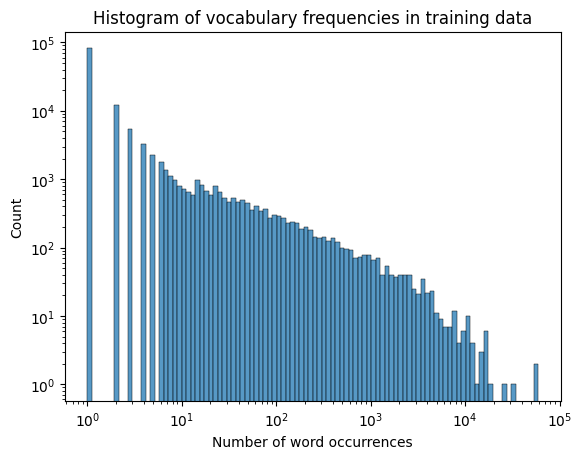

In [ ]:
# Run this cell to explore the vocabulary
import seaborn as sns
count_arr = np.array(list(vocab_count.values()))
vocab = np.array(list(vocab_count.keys()))

# Sorting by frequency
sort_idx = np.argsort(count_arr)[::-1]
vocab = vocab[sort_idx]
count_arr = count_arr[sort_idx]

print(f"Vocabulary size: {len(vocab)}")
print(f"Top 15 frequent words: {', '.join(vocab[:15])}")
print(f"Least frequent 15 words: {', '.join(vocab[-15:])}")
print()

ax = sns.histplot(count_arr, log_scale=True, bins=100)
ax.set_yscale('log')
ax.set_xlabel('Number of word occurrences')
ax.set_title("Histogram of vocabulary frequencies in training data")
plt.show()

### 2.2 **Bag of Words (BoW) model**
Create a simple NN model that utilizes the Bag of Words representation.

#### 2.2.1 **Generate Bag of Words (BoW) representation**

You can use the `CountVectorizer` class from `sklearn` to do this. Since your data is already preprocessed, set the `preprocessor` argument of `CountVectorizer` to pass a function that does nothing (`lambda x: x`). This way, `CountVectorizer` will not do any preprocessing on your data.

Choose a reasonable value for the `max_features` argument. This argument determines how many words will be included in your vocabulary. For example, if your total vocabulary count is 100,000 and you set `max_features = 2,000`, `CountVectorizer` will only consider the **most frequent** 2,000 words in your vocabulary. The rest of the vocabulary will be ignored.

* [CountVectorizer documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [ ]:
# Your solution
from sklearn.feature_extraction.text import CountVectorizer

max_features = 3000 # Choose a value for max_features
vectorizer = CountVectorizer(max_features=max_features, preprocessor=lambda x: x)

# Fit the vectorizer to your train data
vectorizer.fit(train_data)

# Transform the train and test data
train_bow = vectorizer.transform(train_data)
train_bow_dense = train_bow.toarray()
test_bow = vectorizer.transform(test_data)
test_bow_dense = test_bow.toarray()

In [ ]:
# The shape of the train data BoW representation should be
# (Number of data points in training data x max_features)
print(train_bow.shape)

(30000, 3000)


#### 2.2.2 **Train a neural network on BoW data**
Use a small neural network to predict the sentiment of reviews from the BoW representation of the reviews. Use the keras library for this task.

**Notes**:
* Your neural network should have **maximum two hidden layers**.
* Train for **10 epochs or less**
* Choose any method you find suitable to **avoid overfitting**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Build the model
from keras.layers import Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=max_features))
model.add(Dropout(0.5)) #to avoid overfitting
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()

# Train the model
# When fitting the model, set validation_split=0.20 to use 20% of the train data
# for validation
epochs = 10
batch_size = 32
model.fit(train_bow_dense, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                192064    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 192129 (750.50 KB)
Trainable params: 192129 (750.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
750/750 [==============================] - 8s 8ms/step - loss: 0.3782 - accuracy: 0.8400 - val_loss: 0.3131 - val_accuracy: 0.8748
Epoch 2/10
750/750 [==============================] - 6s 8ms/step - loss: 0.2637 - accuracy: 0.8957 - val_loss: 0.3066 - val_accuracy: 0

#### 2.2.3 **Evaluate on test dataset**
After choosing the suitable model hyperparameters and training a model in the previous step, evaluate your model on the test set. Choose the metrics you find suitable for evauluating this model.

**Note**: Evaluation on the test dataset should only be done once. Updating your model iteratively until you get a good performance on the test dataset is not a good practice and will result in overfitting on the test dataset.

In [ ]:
# Evaluate the model on the test set
from sklearn.metrics import accuracy_score
pred = model.predict(test_bow_dense)
pred_binary = (pred > 0.5).astype(int)

accuracy = accuracy_score(test_labels, pred_binary)
print(f'Test Accuracy: {accuracy}')

313/313 [==============================] - 1s 3ms/step
Test Accuracy: 0.8754


### 2.3 **TF-IDF**

Create a simple NN model that utilizes the TF-IDF representation.

#### 2.3.1 **Generate TF-IDF representation**

You can use the `TfidfVectorizer` class from `sklearn` to do this. Since your data is already preprocessed, set the `preprocessor` argument of `TfidfVectorizer` to pass a function that does nothing (`lambda x: x`). This way, `TfidfVectorizer` will not do any preprocessing on your data.

Choose a reasonable value for the `max_features` argument.

* [TfidfVectorizer documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [ ]:
# Your solution
from sklearn.feature_extraction.text import TfidfVectorizer

max_features = 3000
tfidf_vectorizer = TfidfVectorizer(max_features=max_features, preprocessor=lambda x: x)

# Fit the vectorizer to your train data
vectorizer.fit(train_data)

# Transform the train and test data
train_tfidf = vectorizer.transform(train_data)
train_tfidf_dense = train_tfidf.toarray()
test_tfidf = vectorizer.transform(test_data)
test_tfidf_dense = test_tfidf.toarray()

#### 2.3.2 **Train a neural network on TF-IDF data**
Use a small neural network to predict the sentiment of reviews from the TF-IDF representation of the reviews. Use the keras library for this task. **You can use the same neural network structure form the BoW model.**

**Notes**:
* Your neural network should have **maximum two hidden layers**.
* Train for **10 epochs or less**
* Choose any method you find suitable to **avoid overfitting**

In [ ]:
# Build the model

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=max_features))
model.add(Dropout(0.5)) #to avoid overfitting
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()

# Train the model
# When fitting the model, set validation_split=0.20 to use 20% of the train data
# for validation
epochs = 10
batch_size = 32
model.fit(train_tfidf_dense, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                192064    
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 192129 (750.50 KB)
Trainable params: 192129 (750.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3809 - accuracy: 0.8411 - val_loss: 0.3143 - val_accuracy: 0.8700
Epoch 2/10
750/750 [==============================] - 5s 7ms/step - loss: 0.2590 - accuracy: 0.8989 - val_loss: 0.3053 - val_accuracy: 0

#### 2.2.3 **Evaluate on test dataset**
After choosing the suitable model hyperparameters and training a model in the previous step, evaluate your model on the test set. Choose the metrics you find suitable for evauluating this model.

In [ ]:
# Evaluate the model on the test set
from sklearn.metrics import accuracy_score
pred_2 = model.predict(test_tfidf_dense)
pred_binary_2 = (pred_2 > 0.5).astype(int)

accuracy_2 = accuracy_score(test_labels, pred_binary_2)
print(f'Test Accuracy: {accuracy_2}')

313/313 [==============================] - 1s 3ms/step
Test Accuracy: 0.875


### 2.4 **Word2Vec**
In this section, you will use Word2Vec representations to train a simple neural network to predict the sentiments of reviews.

#### 2.4.1 **Preliminary About Word2Vec**

In [ ]:
import gensim.downloader
from gensim.models import Word2Vec

The following cell will load a pretrained Word2Vec model. This is a model trained on a large corpus of data to produce meaningful representations of words as vectors.

In [ ]:
# Loading pretrained Word2Vec model (Word embeddings)
model_name = "glove-wiki-gigaword-100"
word_to_vec = gensim.downloader.load(model_name)

In [ ]:
# Getting the representation of a word
dog = word_to_vec["dog"]
dog

array([ 0.30817  ,  0.30938  ,  0.52803  , -0.92543  , -0.73671  ,
        0.63475  ,  0.44197  ,  0.10262  , -0.09142  , -0.56607  ,
       -0.5327   ,  0.2013   ,  0.7704   , -0.13983  ,  0.13727  ,
        1.1128   ,  0.89301  , -0.17869  , -0.0019722,  0.57289  ,
        0.59479  ,  0.50428  , -0.28991  , -1.3491   ,  0.42756  ,
        1.2748   , -1.1613   , -0.41084  ,  0.042804 ,  0.54866  ,
        0.18897  ,  0.3759   ,  0.58035  ,  0.66975  ,  0.81156  ,
        0.93864  , -0.51005  , -0.070079 ,  0.82819  , -0.35346  ,
        0.21086  , -0.24412  , -0.16554  , -0.78358  , -0.48482  ,
        0.38968  , -0.86356  , -0.016391 ,  0.31984  , -0.49246  ,
       -0.069363 ,  0.018869 , -0.098286 ,  1.3126   , -0.12116  ,
       -1.2399   , -0.091429 ,  0.35294  ,  0.64645  ,  0.089642 ,
        0.70294  ,  1.1244   ,  0.38639  ,  0.52084  ,  0.98787  ,
        0.79952  , -0.34625  ,  0.14095  ,  0.80167  ,  0.20987  ,
       -0.86007  , -0.15308  ,  0.074523 ,  0.40816  ,  0.0192

These representations are meaningful in a sense that words that have similar meanings are closer to each other. In general, when dealing with vector representations, we use **cosine similarity** to see how similar two vectors are. it returns a value between -1 and +1, the higher the value the more similar two vectors are.

Notice in the example below that **car** is more similar to **vehicle** than **cat**.

In [ ]:
from  sklearn.metrics.pairwise import cosine_similarity
car = word_to_vec["car"].reshape(1, -1) # Reshaping because cosine_similarity function requires a 2D array
cat = word_to_vec["cat"].reshape(1, -1)
vehicle = word_to_vec["vehicle"].reshape(1, -1)

print(f"Similarity between car and cat: {cosine_similarity(car, cat)}")
print(f"Similarity between car and vehicle: {cosine_similarity(car, vehicle)}")

Similarity between car and cat: [[0.31097823]]
Similarity between car and vehicle: [[0.86308384]]


#### 2.4.2 **Use pretrained Word2Vec model**
First, you will try to use the pretrained Word2Vec model to generate representations for each review and use the representation to train a neural network.

Remember that we are trying to classify movie reviews, which have can have any number of words. Word2Vec returns a vector representation for each word. Therefore, you have to find a way to create a **fixed-sized representation** for the whole review. Fixed-size means that the vector representation of each review should have the same size regardless of the length of the review.

In [ ]:
# Your solution
# This function should convert each review to a fixed-sized vectoriz representation
def vectorize(review):
  # WRITE YOUR CODE HERE
  words = word_tokenize(review.lower())
  vectors = [word_to_vec[word] for word in words if word in word_to_vec]

  if vectors:
    review_vector = np.mean(vectors, axis=0)
  else:
    review_vector = np.zeros(word_to_vec.vector_size)
  return review_vector

# Applying your function to convert the train and test reviews to vector representations
# WRITE YOUR CODE HERE
train_word2vec = np.vstack([vectorize(review) for review in train_data])
test_word2vec = np.vstack([vectorize(review) for review in test_data])


Train a neural network:

In [ ]:
# Build the model
num_features = word_to_vec.vector_size

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=num_features))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()

# Train the model
# When fitting the model, set validation_split=0.20 to use 20% of the train data
# for validation
epochs = 10
batch_size = 32
model.fit(train_word2vec, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                6464      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 6529 (25.50 KB)
Trainable params: 6529 (25.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 0.5686 - accuracy: 0.7143 - val_loss: 0.5279 - val_accuracy: 0.7393
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.5107 - accuracy: 0.7548 - val_loss: 0.5168 - val_accuracy: 0.7483
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.5009 - accuracy: 0.7605 - val_loss: 0.5010 - val_accurac

Evaluate the model on the test dataset:

In [ ]:
# Evaluate the Model
pred_3 = model.predict(test_word2vec)
pred_binary_3 = (pred_3 > 0.5).astype(int)

accuracy_3 = accuracy_score(test_labels, pred_binary_3)
print(f'Test Accuracy: {accuracy_3}')

313/313 [==============================] - 1s 1ms/step
Test Accuracy: 0.7658


#### 2.4.3 **Train your own Word2Vec model**
In cases where we have enough data, training a new Word2Vec model may provide better results than using a pretrained one. Here, you will train your own Word2Vec model using the training data and then use it to create vector representations for the reviews.

You can change the hyperparameters to train your Word2Vec model:
* **vector_size**: The length of the vector that will be used to represent words.
* **window**: The window sized used in the Word2Vec training
* **min_count**: Minimum number of occurunces for a word to be included in the model.


In [ ]:
# Converting sentences to list of words
sentences = [sentence.split() for sentence in train_data]

# Training model
vector_size = 100
window = 5
min_count = 1

w2v_model = Word2Vec(
    sentences,
    vector_size=vector_size,
    window=window,
    min_count=min_count,
    workers=4)

Apply the same function you created above to create vector representations for the reviews from your trained Word2Vec model:

In [ ]:
# Your solution
# This function should convert each review to a fixed-sized vectoriz representation
def vectorize(review):
  words = word_tokenize(review.lower())
  vectors = [w2v_model.wv[word] for word in words if word in w2v_model.wv.key_to_index]

  if vectors:
    review_vector = np.mean(vectors, axis=0)
  else:
    review_vector = np.zeros(w2v_model.vector_size)
  return review_vector

# Applying your function to convert the train and test reviews to vector representations
# WRITE YOUR CODE HERE
train_w2v = np.vstack([vectorize(review) for review in train_data])
test_w2v = np.vstack([vectorize(review) for review in test_data])

Train a neural network:

In [ ]:
# Build the model
num_features = w2v_model.vector_size

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=num_features))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
# WRITE YOUR CODE HERE
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Show model summary
# WRITE YOUR CODE HERE
model.summary()

# Train the model
# When fitting the model, set validation_split=0.20 to use 20% of the train data
# for validation
# WRITE YOUR CODE HERE
epochs = 10
batch_size = 32
model.fit(train_w2v, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                6464      
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 6529 (25.50 KB)
Trainable params: 6529 (25.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
750/750 [==============================] - 4s 4ms/step - loss: 0.4141 - accuracy: 0.8153 - val_loss: 0.3819 - val_accuracy: 0.8285
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3643 - accuracy: 0.8403 - val_loss: 0.3708 - val_accuracy: 0.8385
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3565 - accuracy: 0.8461 - val_loss: 0.3690 - val_accurac

Evaluate the model on the test dataset:

In [ ]:
# Evaluate the Model
pred_4 = model.predict(test_w2v)
pred_binary_4 = (pred_4 > 0.5).astype(int)

accuracy_4 = accuracy_score(test_labels, pred_binary_4)
print(f'Test Accuracy: {accuracy_4}')

313/313 [==============================] - 1s 1ms/step
Test Accuracy: 0.8439
